<a href="https://colab.research.google.com/github/yasnilamw/MSIB-K2-KelasAwanPintar/blob/main/25_09_24ML_2_Classification_using_k_NN_Diaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-2 Classification using k-NN

**STUDI KASUS: Customer Churn**

Terdapat dataset konsumen dengan 2 kategori churn, yaitu:
- **pelanggan aktif (0)** dan
- **pelanggan yang sudah berhenti (1)**

## Mengimport Library

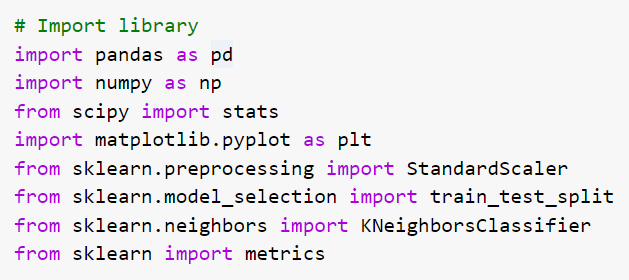

In [ ]:
# import library
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## Load Dataset


Download dataset [di sini](https://drive.google.com/file/d/1URwnm91LhW_4awdLNglxmBG62bdnngMD/view?usp=sharing).

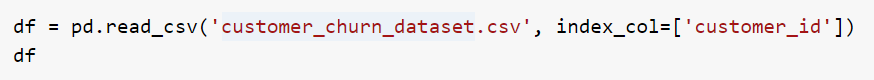

In [ ]:
df = pd.read_csv('customer_churn_dataset.csv', index_col=['customer_id'])
df

,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
customer_id,,,,,,,,,,,,,,
285fae8412c4720a0c79d95f98434422,Kartu A,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
f45bce87ca6bf100f222fcc0db06b624,Kartu A,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
09b54557b1e2a10d998e3473a9ccd2a0,Kartu A,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
11f252f48be36f93dd429f2ec86cb2f5,Kartu A,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
a8df29ae9195eea348d2f74c967b978d,Kartu A,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9e8b318d96caa9c0c4a50e8e59f5026c,Kartu B,1634.33,12085.33,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1,490,1
a310627191bdbded3905ac73e77fe319,Kartu B,30000.33,45170.67,0.0,0.0,0.00,0.0,20001.0,0.0,0.0,0.0,1,3120,1
b6f11059e5c1df69b8c16d5c39af23dc,Kartu B,3333.33,13338.67,0.0,0.0,872.00,0.0,0.0,0.0,0.0,0.0,1,483,1


### Data Preprocessing

Library ML umumnya hanya bisa memproses data numerik. Karena hal itu, kita perlu mengubah kolom bernilai kategorik menjadi nilai numerik.

Pada kolom product nilai atribut:
- Kartu A didefinisikan sebagai 0
- Kartu B didefinisikan sebagai 1, dan
- Kartu C didefinisikan sebagai 2

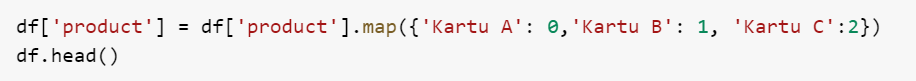

In [ ]:
df['product'] = df['product'].map({'Kartu A': 0, 'Kartu B': 1, 'Kartu C':2})
df.head()

,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
customer_id,,,,,,,,,,,,,,
285fae8412c4720a0c79d95f98434422,0,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
f45bce87ca6bf100f222fcc0db06b624,0,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
09b54557b1e2a10d998e3473a9ccd2a0,0,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
11f252f48be36f93dd429f2ec86cb2f5,0,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
a8df29ae9195eea348d2f74c967b978d,0,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0


### Split Feature (X) dan Label (Y)

Selanjutnya, pisahkan X dan Y dari dataset. Ubah DataFrame menjadi numpy array dengan method `.values`.

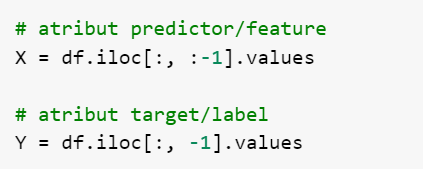

In [ ]:

# atribut predictor/feature
X = df.iloc[:, : -1].values

# atribut target/label
Y = df.iloc[:, -1].values

### Normalisasi Data

K-NN merupakan metode yang didasarkan pada tingkat kedekatan antar-atribut.

Oleh karena itu, sangat disarankan untuk melakukan normalisasi data agar perhitungan jarak menjadi lebih valid.

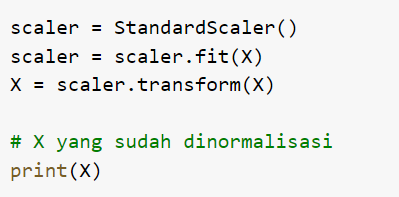

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)

# X yang sudah dinormalisasi
print(X)

[[-2.74633519 -0.06533577 -0.10928982 ... -0.10382853  1.09574842
  -0.40182793]
 [-2.74633519 -0.06910676 -0.10051651 ...  0.41095635  0.78711732
  -0.64273207]
 [-2.74633519  0.12440994  0.06632798 ...  0.0304047   1.09574842
   0.2862261 ]
 ...
 [-1.10917561 -0.13604637 -0.15468454 ... -0.19349668 -1.06466927
  -0.56830178]
 [-1.10917561 -0.07325939 -0.07248941 ... -0.19349668  1.09574842
  -0.39614623]
 [ 0.52798396 -0.1457059  -0.16395316 ... -0.19349668 -1.06466927
  -0.71659419]]


### Splitting Data

Untuk menghasilkan model yang baik, perlu dilakukan pengujian yang baik

Aturan umum yang berlaku adalah data training dan testing harus dipisahkan terlebih dahulu. Dengan kata lain tidak boleh menggunakan data yang sama untuk training dan testing.

Kali ini kita membagi dataset dengan komposisi **sebesar 80% data training dan 20% data testing.**

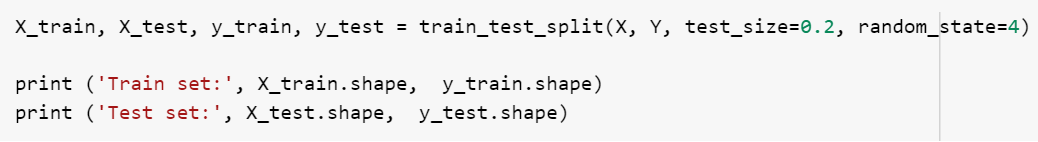

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape, y_train. shape)
print ('Test set:', X_test.shape, y_test. shape)

Train set: (8000, 13) (8000,)
Test set: (2000, 13) (2000,)


**Training Model**

Pertama, tentukan nilai k. Kita akan coba dengan nikai k=7:

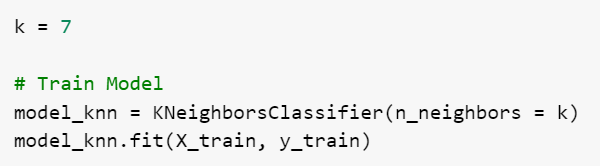

In [ ]:
k = 7

# Train Model
model_knn = KNeighborsClassifier(n_neighbors = k)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

**Predicting**

Kita sudah dapat menggunakan model yang telah di-training untuk **memprediksikan data**

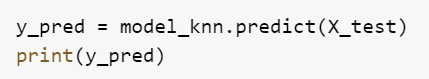

In [ ]:
y_pred = model_knn.predict(X_test)
print(y_pred)

[0 1 0 ... 1 0 0]


**Perhitungan Akurasi**

Pada klasifikasi, nilai akurasi klasifikasi secara sederhana dapat dihitung dengan:

membandingkan kelas **hasil prediksi model** dengan **kelas sebenarnya/actual class**.

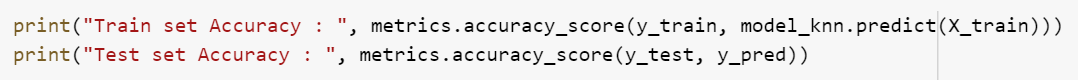

In [ ]:
print("Train set Accuracy : ", metrics.accuracy_score(y_train, model_knn.predict(X_train)))
print("Test set Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy :  0.93475
Test set Accuracy :  0.9185


Accuracy train set dan test set tidak terpaut jauh. Accuracy keduanya juga sangat tinggi.

Bisa dikatakan model dengan k=7 sudah **Good Fit**.

**Note**: Pada praktiknya kita harus memilih metrics yang cocok untuk kasus customer churn, apakah accuracy, precision, atau recall. Supaya lebih mudah, kita hanya memilih metric accuracy.

**Klasifikasi Data Baru**

Model yang sudah good fit bisa kita gunakan untuk memprediksi data baru.

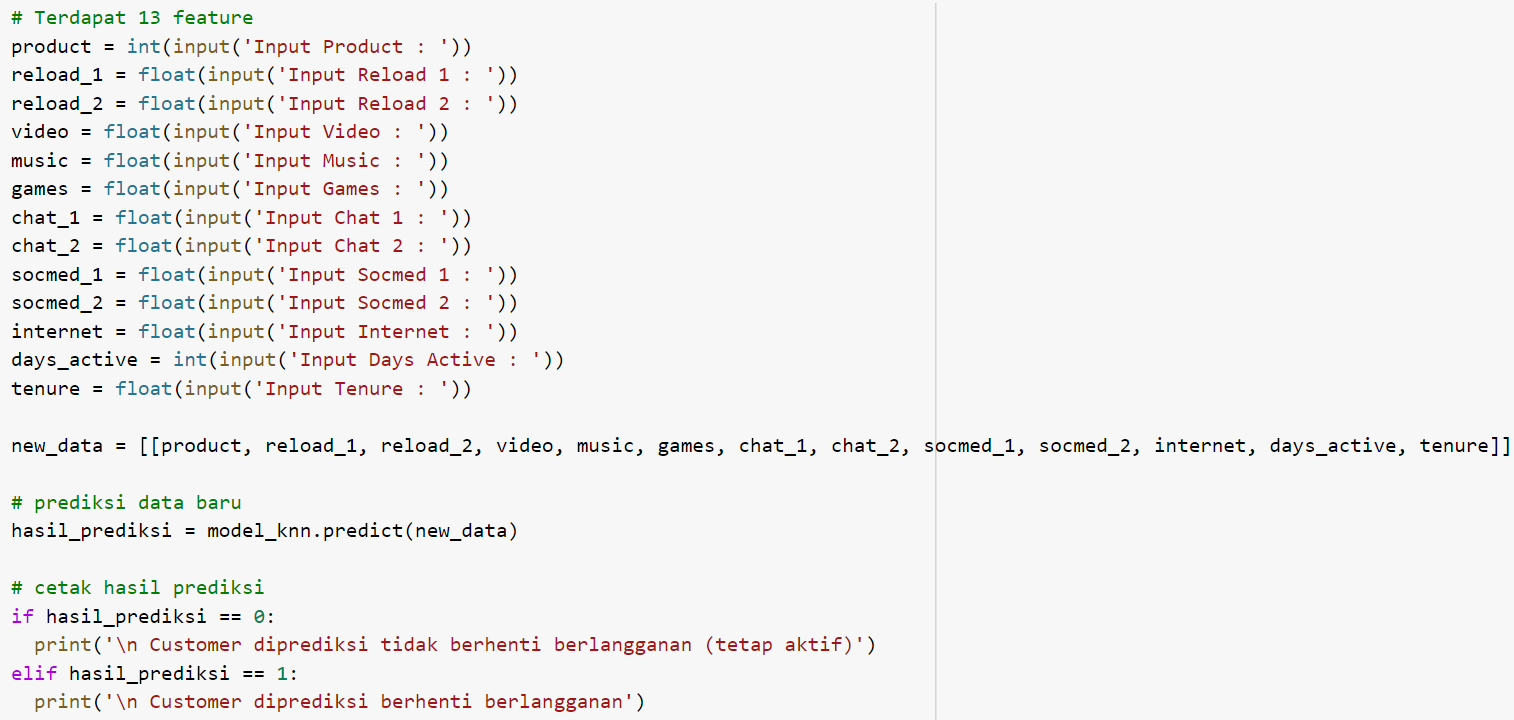

In [ ]:

#Terdapat 13 feature

product = int(input('Input Product:'))
reload_1 = float(input('Input Reload 1:'))
reload_2 = float(input('Input Reload 2:'))
video = float(input('Input Video: '))
music = float(input('Input Music: '))
games = float(input('Input Games:'))
chat_1 = float(input('Input Chat 1:'))
chat_2 = float(input('Input Chat 2:'))
socmed_1 = float(input('Input Socmed 1:'))
socmed_2= float(input('Input Socmed 2: '))
internet = float(input('Input Internet :'))
days_active = int(input('Input Days Active :'))
tenure = float(input('Input Tenure: '))

new_data = [[product, reload_1, reload_2, video, music, games, chat_1, chat_2, socmed_1, socmed_2, internet, days_active, tenure]]

# prediksi data baru

hasil_prediksi = model_knn.predict(new_data)
# cetak hasil prediksi

if hasil_prediksi == 0:
  print('\n Customer diprediksi tidak berhenti berlangganan (tetap aktif)')
elif hasil_prediksi == 1:
  print('\n Customer diprediksi berhenti berlangganan')

Input Product:0
Input Reload 1:1
Input Reload 2:2
Input Video: 0
Input Music: 0
Input Games:0
Input Chat 1:1
Input Chat 2:2
Input Socmed 1:1
Input Socmed 2: 2
Input Internet :0
Input Days Active :0
Input Tenure: 0

 Customer diprediksi tidak berhenti berlangganan (tetap aktif)


---

### **MENCARI NILAI K TERBAIK**

Performa dari model K-NN **sangat bergantung dengan nilai K**.

Lalu bagaimana memilih nilai K yang terbaik? Jawabnya, kita harus lakukan pengujian.

Kode berikut ini bertujuan untuk melakukan pengujian nilai k dari **k=1** sampai dengan **k=10**.

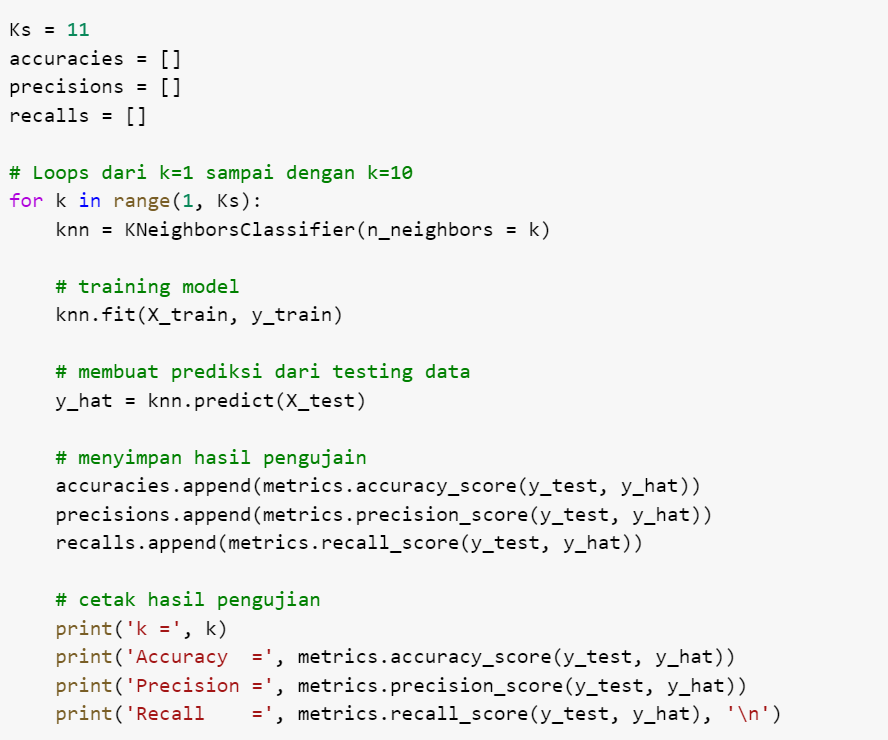

In [ ]:
Ks = 11
accuracies = []
precisions = []
recalls = []

# Loops dari k=1 sampai dengan k=10
for k in range(1, Ks):
    knn = KNeighborsClassifier(n_neighbors = k)

    # training model
    knn.fit(X_train, y_train)

    # membuat prediksi dari testing data
    y_hat = knn.predict(X_test)

    # menyimpan hasil pengujain
    accuracies.append(metrics.accuracy_score(y_test, y_hat))
    precisions.append(metrics.precision_score(y_test, y_hat))
    recalls.append(metrics.recall_score(y_test, y_hat))

    # cetak hasil pengujian
    print('k =', k)
    print('Accuracy  =', metrics.accuracy_score(y_test, y_hat))
    print('Precision =', metrics.precision_score(y_test, y_hat))
    print('Recall    =', metrics.recall_score(y_test, y_hat), 'In')

k = 1
Accuracy  = 0.914
Precision = 0.7876543209876543
Recall    = 0.7876543209876543 In
k = 2
Accuracy  = 0.9225
Precision = 0.890625
Recall    = 0.7037037037037037 In
k = 3
Accuracy  = 0.926
Precision = 0.8372703412073491
Recall    = 0.7876543209876543 In
k = 4
Accuracy  = 0.9265
Precision = 0.8862275449101796
Recall    = 0.7308641975308642 In
k = 5
Accuracy  = 0.922
Precision = 0.8467966573816156
Recall    = 0.7506172839506173 In
k = 6
Accuracy  = 0.922
Precision = 0.8738738738738738
Recall    = 0.7185185185185186 In
k = 7
Accuracy  = 0.9185
Precision = 0.8497109826589595
Recall    = 0.725925925925926 In
k = 8
Accuracy  = 0.9185
Precision = 0.8711656441717791
Recall    = 0.7012345679012346 In
k = 9
Accuracy  = 0.9145
Precision = 0.8421052631578947
Recall    = 0.7111111111111111 In
k = 10
Accuracy  = 0.9115
Precision = 0.8607594936708861
Recall    = 0.671604938271605 In


**Kita juga bisa menampilkan grafik / plot-nya untuk mempermudah pembacaan hasil pengujian**

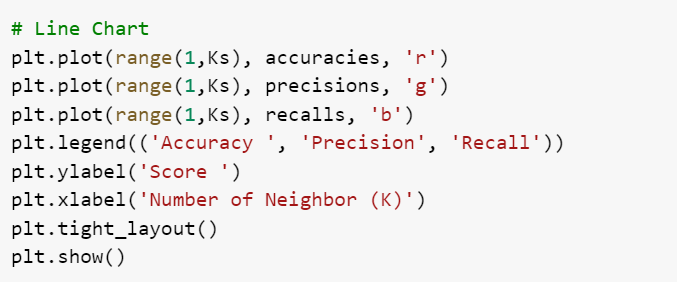

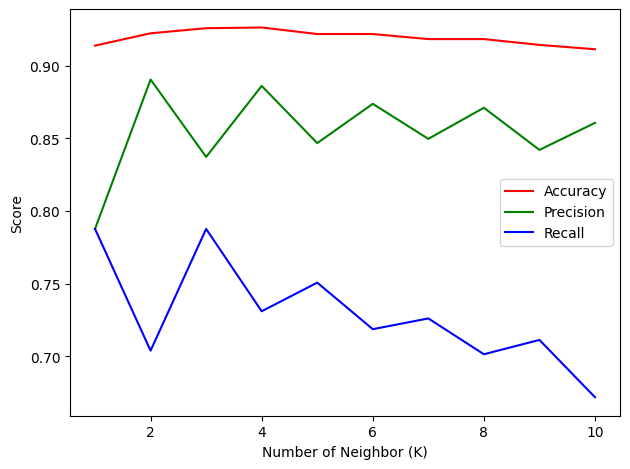

In [ ]:

# Line Chart
plt.plot(range (1, Ks), accuracies, 'r')
plt.plot(range (1, Ks), precisions, 'g')
plt.plot(range (1, Ks), recalls, 'b')
plt.legend(('Accuracy', 'Precision', 'Recall'))
plt.ylabel('Score')
plt.xlabel('Number of Neighbor (K)')
plt.tight_layout()
plt.show()

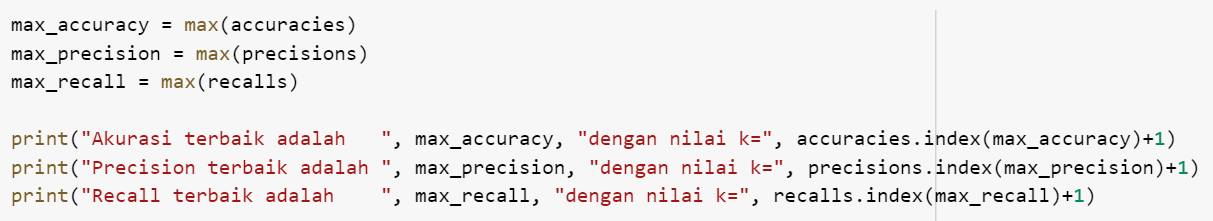

In [ ]:

max_accuracy = max(accuracies)
max_precision = max(precisions)
max_recall = max(recalls)

print("Akurasi terbaik adalah ", max_accuracy, "dengan nilai k=", accuracies.index(max_accuracy)+1)
print("Precision terbaik adalah", max_precision, "dengan nilai k=", precisions.index(max_precision)+1)
print("Recall terbaik adalah ", max_recall, "dengan nilai k=", recalls.index(max_recall)+1)

Akurasi terbaik adalah  0.9265 dengan nilai k= 4
Precision terbaik adalah 0.890625 dengan nilai k= 2
Recall terbaik adalah  0.7876543209876543 dengan nilai k= 1


## Kesimpulan

Supaya lebih mudah, kita akan pilih model terbaik berdasarkan metric accuracy.

Berdasarkan metric accuracy, model terbaik adalah **model dengan nilai k=4**.

Setelah diketahui nilai k terbaik, kita perlu melatih ulang model menggunakan nilai k tersebut.

# Exercise (Latihan)

1. Cari model dengan k terbaik menggunakan metric yang sesuai untuk studi kasus customer churn!
2. Lakukan pemodelan k-NN menggunakan model dengan k terbaik (poin 1)!

In [ ]:
# Import libraries yang dibutuhkan
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Load dataset
# Misal dataset customer churn sudah dalam format CSV
# data = pd.read_csv('customer_churn.csv')

# Untuk contoh ini, kita menggunakan dataset tiruan
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 2. Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Cari k terbaik menggunakan GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 21)}
knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# 5. Dapatkan k terbaik
best_k = grid_search.best_params_['n_neighbors']
print(f"k terbaik: {best_k}")

# 6. Latih model dengan k terbaik
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

# Prediksi pada data testing
y_pred = best_knn.predict(X_test_scaled)

# Evaluasi performa model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

k terbaik: 19
Confusion Matrix:
[[84  9]
 [31 76]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.90      0.81        93
           1       0.89      0.71      0.79       107

    accuracy                           0.80       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.82      0.80      0.80       200

